<a href="https://colab.research.google.com/github/amoghsawant17/EDA_Project_Amogh/blob/main/EDA_Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Hotel Booking Analysis



##### **Project Type**    - EDA
##### **Contribution**    - Individual


# **Project Summary -**

####Introduction:
The Hotel Booking Analysis project aims to analyze a comprehensive dataset covering hotel bookings spanning from July 2015 to August 2017. By exploring this dataset, we seek to gain valuable insights into various aspects of hotel bookings, including booking patterns, customer preferences, seasonality, and other factors that influence the hotel industry. This project summary provides an overview of the dataset, the objectives of the analysis, and the key findings derived from the exploration.

####Dataset Overview:
The dataset used for this project comprises hotel booking data collected over a two-year period, from July 2015 to August 2017. It includes information about bookings made in two hotel types, with a focus on attributes such as customer demographics, booking details (e.g., dates, room types, meal plans), and hotel-specific information. The dataset also contains data regarding cancellations, enabling a comprehensive analysis of booking behavior.

####Objectives:
* Booking Patterns: Analyze booking patterns over time, including seasonality, trends, and demand fluctuations, to understand the factors that influence hotel reservations.

* Customer Segmentation: Segment customers based on various attributes such as demographics, booking behavior, and stay duration to identify distinct customer groups and their preferences.

* Booking Channels: Evaluate the impact of different booking channels (e.g., online travel agencies, direct bookings) on the hotel industry and identify the most popular and effective channels for hotel reservations.

* Cancellations: Investigate the reasons behind booking cancellations, and identify potential strategies to reduce these occurrences, thereby optimizing hotel revenue.

####Methodology:
* Data Cleaning: Preprocess the dataset by handling missing values, outliers, and inconsistencies to ensure data quality and reliability.

* Exploratory Data Analysis (EDA): Perform data wrangling, data visualization, and segmentation techniques to gain initial insights into the dataset and identify patterns, trends, and relationships.

#### Key Findings:
* Seasonal Patterns: Discovered the peak booking seasons and identified the factors contributing to fluctuations in demand, enabling hotels to optimize pricing and resource allocation.

* Customer Segmentation: Identified different customer segments based on demographics, booking behavior, and preferences, allowing hotels to tailor marketing strategies and services to specific customer groups.

* Booking Channels: Determined the most effective booking channels for hotels to evaluate their impact on revenue and customer satisfaction, enabling informed marketing decisions.

* Cancellations: Understood the underlying reasons for booking cancellations, enabling hotels to implement strategies to minimize these occurrences and optimize revenue.

####Conclusion:
The Hotel Booking Analysis project provides valuable insights into hotel booking patterns, customer preferences, and revenue optimization strategies.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem is to analyze a hotel booking dataset from July 2015 to August 2017 and derive insights to address the following challenges:
- Booking Patterns and Seasonality: Identify seasonal trends, peak booking periods, and demand fluctuations to optimize resource allocation.
- Customer Segmentation and Preferences: Segment customers based on demographics and booking behavior to personalize marketing campaigns and enhance customer satisfaction.
- Booking Channels and Revenue Analysis: Evaluate the effectiveness of booking channels and optimize distribution strategies to maximize revenue.
- Cancellations: Variables impacting cancellations to minimize revenue losses and optimize occupancy rates.

#### **Define Your Business Objective?**


####Business Objective: Maximize revenue, enhance customer satisfaction, and optimize operations through data-driven insights derived from the analysis of hotel bookings dataset from July 2015 to August 2017.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

###Data Preparation and Cleaning
1. Load the file using Pandas
2. Look at some information about the data & the columns
3. Fix any missing or incorrect values

### Import Libraries


In [2]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
!pip install pymysql
import pymysql
from sqlalchemy import create_engine
from sqlalchemy.pool import NullPool

from scipy.stats import *
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from sklearn.tree import export_graphviz

!pip install shap==0.40.0
import shap
import graphviz
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_path = '/content/drive/MyDrive/Colab Notebooks/PYTHON_MODULE/EDA_Project/Hotel Bookings.csv'
df = pd.read_csv(file_path)

### Dataset First View

In [5]:
# Dataset First Look
pd.set_option ("display.max_columns", 40)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [9]:
missing_percentages = df.isnull().sum().sort_values(ascending=False)/len(df)
missing_percentages

company                           0.943069
agent                             0.136862
country                           0.004087
children                          0.000034
reserved_room_type                0.000000
assigned_room_type                0.000000
booking_changes                   0.000000
deposit_type                      0.000000
hotel                             0.000000
previous_cancellations            0.000000
days_in_waiting_list              0.000000
customer_type                     0.000000
adr                               0.000000
required_car_parking_spaces       0.000000
total_of_special_requests         0.000000
reservation_status                0.000000
previous_bookings_not_canceled    0.000000
is_repeated_guest                 0.000000
is_canceled                       0.000000
distribution_channel              0.000000
market_segment                    0.000000
meal                              0.000000
babies                            0.000000
adults     

<Axes: >

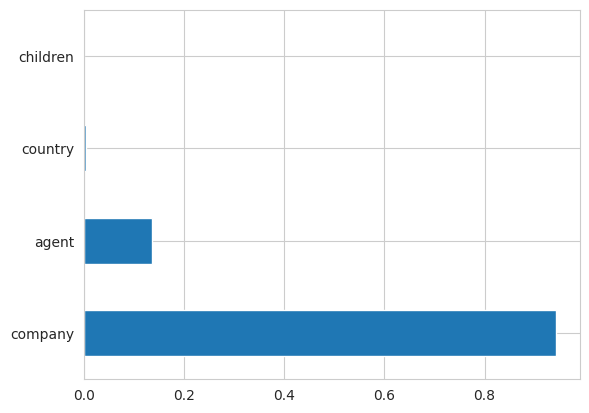

In [10]:
# Visualizing the missing values
missing_percentages[missing_percentages!=0].plot(kind='barh')

In addition to the heatmap, there is a bar on the right side of this diagram. This is a line plot for each row's data completeness. In this dataset, all rows have 29 - 32 valid values and hence 0 - 3 missing values.

In [11]:
# fixing missing values
df['company'].fillna(0,inplace=True)
df['agent'].fillna(0,inplace=True)
df['country'].fillna(0,inplace=True)
df['children'].fillna(0,inplace=True)

In [12]:
# fixing missing values
df.isna().sum().sort_values(ascending=False)

hotel                             0
is_canceled                       0
reservation_status                0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number    

#### Duplicate Values

In [13]:
# Dataset Duplicate Value Count
df.duplicated().value_counts()

False    87396
True     31994
dtype: int64

In [14]:
df_new = df.drop_duplicates()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  float64
 11  babies                          87396 non-null  int64  
 12  meal                           

### What did you know about your dataset?

In [15]:
df_new.groupby(['arrival_date_month', 'arrival_date_year']).count()

hotel  is_canceled  lead_time  \
arrival_date_month arrival_date_year                                  
April              2016                3770         3770       3770   
                   2017                4138         4138       4138   
August             2015                2453         2453       2453   
                   2016                4423         4423       4423   
                   2017                4381         4381       4381   
December           2015                1982         1982       1982   
                   2016                3149         3149       3149   
February           2016                2806         2806       2806   
                   2017                3292         3292       3292   
January            2016                1849         1849       1849   
                   2017                2844         2844       2844   
July               2015                1674         1674       1674   
                   2016                3851         3851       3851   
                   2017                4532         4532       4532   
June               2016                3517         3517       3517   
                   2017                4248         4248       4248   
March              2016                3831         3831       3831   
                   2017                3682         3682       3682   
May                2016                3780         3780       3780   
                   2017                4575         4575       4575   
November           2015                1665         1665       1665   
                   2016                3330         3330       3330   
October            2015                2700         2700       2700   
                   2016                4234         4234       4234   
September          2015                2839         2839       2839   
                   2016                3851         3851       3851   

                                      arrival_date_week_number  \
arrival_date_month arrival_date_year                             
April              2016                                   3770   
                   2017                                   4138   
August             2015                                   2453   
                   2016                                   4423   
                   2017                                   4381   
December           2015                                   1982   
                   2016                                   3149   
February           2016                                   2806   
                   2017                                   3292   
January            2016                                   1849   
                   2017                                   2844   
July               2015                                   1674   
                   2016                                   3851   
                   2017                                   4532   
June               2016                                   3517   
                   2017                                   4248   
March              2016                                   3831   
                   2017                                   3682   
May                2016                                   3780   
                   2017                                   4575   
November           2015                                   1665   
                   2016                                   3330   
October            2015                                   2700   
                   2016                                   4234   
September          2015                                   2839   
                   2016                                   3851   

                                      arrival_date_day_of_month  \
arrival_date_month arrival_date_year                              
April              2016                                    3770   

### Duration of this dataset is between July, 2015 & August, 2017. Data available for July  & August for consecutive three years.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [17]:
# Dataset Describe
df_new.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138633,0.010824,0.039075,0.030413,0.183990,0.271603,81.004657,11.016809,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455871,0.113597,0.193775,0.369145,1.731894,0.727245,109.945638,54.047484,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,0.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

* **Hotel:** H1=Resort Hotel;  H2=City Hotel
* **Is_cancelled:** If the booking was cancelled(1) or not(0)
* **lead_time:** Number of days that elapsed between the entering date of the booking into PMS and the arrival date
* **arrival_date_year:** Year of arrival date
* **arrival_date_month:** Month of arrival date
* **arrival_date_week_number:** Week number of arrival date
* **arrival_dat_day:** Day of arrival date
* **stays_in_weekend_nights:** Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **stays_in_weekday_nights:** Number of weekend nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **adults:** Number of adults
* **children:** Number of children
* **babies:** Number of babies
* **meal:** Kind of meal opted for
* **country:** Country code
* **market_segment:** Which segment the customer belongs to stay-corporate booking/Direct/TA/TO
* **Distribution_channel:** How the customer accessed the stay-corporate booking/Direct/TA/TO
* **is_repeated_guest:** Guest coming for first time or not
* **previous_cancellation:** Was there a cancellation before
* **previous_bookings:** Count of previous bookings
* **reserved_room_type:** Type of room reserved
* **assigned_room_type:** Type of room assigned
* **booking_changes:** Count of changes made to booking
* **deposit_type:** Deposit type
* **agent:** Booked through agent
* **days_in_waiting_list:** Number of days in waiting list
* **Customer_type:** Type of customer
* **required_car_parking:** If car parking is required
* **total_of_special_req:** Number of additional special requirements
* **adr:** Average Daily Rate is defined as dividing the sum of all lodging transactions by the total number of staying nights
* **reservation_status:** Reservation status
* **reservation_status_date:** Date of the specific status



### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
for i in df_new.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  hotel is 2 .
No. of unique values in  is_canceled is 2 .
No. of unique values in  lead_time is 479 .
No. of unique values in  arrival_date_year is 3 .
No. of unique values in  arrival_date_month is 12 .
No. of unique values in  arrival_date_week_number is 53 .
No. of unique values in  arrival_date_day_of_month is 31 .
No. of unique values in  stays_in_weekend_nights is 17 .
No. of unique values in  stays_in_week_nights is 35 .
No. of unique values in  adults is 14 .
No. of unique values in  children is 5 .
No. of unique values in  babies is 5 .
No. of unique values in  meal is 5 .
No. of unique values in  country is 178 .
No. of unique values in  market_segment is 8 .
No. of unique values in  distribution_channel is 5 .
No. of unique values in  is_repeated_guest is 2 .
No. of unique values in  previous_cancellations is 15 .
No. of unique values in  previous_bookings_not_canceled is 73 .
No. of unique values in  reserved_room_type is 10 .
No. of unique values in

## 3. ***Data Wrangling***

### What all manipulations have you done and insights you found?

In [19]:
# Changing datatype of "children" from (float) to (int) and filling (0) incase of null values
df_new['children'].fillna(0,inplace=True)
df_new['children'] = df_new['children'].astype(int)

In [20]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           87396 non-null  object 
 1   is_canceled                     87396 non-null  int64  
 2   lead_time                       87396 non-null  int64  
 3   arrival_date_year               87396 non-null  int64  
 4   arrival_date_month              87396 non-null  object 
 5   arrival_date_week_number        87396 non-null  int64  
 6   arrival_date_day_of_month       87396 non-null  int64  
 7   stays_in_weekend_nights         87396 non-null  int64  
 8   stays_in_week_nights            87396 non-null  int64  
 9   adults                          87396 non-null  int64  
 10  children                        87396 non-null  int64  
 11  babies                          87396 non-null  int64  
 12  meal                           

In [21]:
df_new.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01


###Eliminating some columns which are not relevant for our analysis

In [22]:
# Creating one column for 'Total_Guests'
df_new['Total_Guests'] = df_new['adults'] + df_new['children'] + df_new['babies']

In [23]:
# Creating one column for 'Total_stay'
df_new['Total_stay'] = df_new['stays_in_weekend_nights'] + df_new['stays_in_week_nights']

In [24]:
# Dropping 'adults' & 'children' columns
df_new = df_new.drop(['adults', 'children', 'babies'], axis=1)

In [25]:
# Removing rows containing zero 'Total_Guests'
df_new= df_new[df_new.Total_Guests > 0]

In [26]:
df_new.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'Total_Guests',
       'Total_stay'],
      dtype='object')

In [27]:
# Hotel Bookings in a year
first = df_new[df_new.arrival_date_year == 2015]
second = df_new[df_new.arrival_date_year == 2016]
third = df_new[df_new.arrival_date_year == 2017]

In [28]:
# Hotel Bookings for 2015
f = first.arrival_date_year.count()
f

13284

In [29]:
# Hotel Bookings for 2016
s = second.arrival_date_year.count()
s

42313

In [30]:
# Hotel Bookings for 2017
t = third.arrival_date_year.count()
t

31633

In [31]:
# Booking Cancellations in a year
first_c = df_new[(df_new.arrival_date_year == 2015) & (df_new.is_canceled == 1)]
second_c = df_new[(df_new.arrival_date_year == 2016) & (df_new.is_canceled == 1)]
third_c = df_new[(df_new.arrival_date_year == 2017) & (df_new.is_canceled == 1)]

In [32]:
# Booking Cancellations in 2015
f_c = first_c.is_canceled.count()
f_c

2703

In [33]:
# Booking Cancellations in 2016
s_c = second_c.is_canceled.count()
s_c

11200

In [34]:
# Booking Cancellations in 2017
t_c = third_c.is_canceled.count()
t_c

10106

In [35]:
# Percentages of booking Cancellations over the years
print("Percentage of booking Cancellations in 2015: ", (f_c / f)*100)
print("Percentage of booking Cancellations in 2016: ", (s_c / s)*100)
print("Percentage of booking Cancellations in 2017: ", (t_c / t)*100)

Percentage of booking Cancellations in 2015:  20.347786811201445
Percentage of booking Cancellations in 2016:  26.469406565358167
Percentage of booking Cancellations in 2017:  31.947649606423674


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

###Hotel wise Yearly Bookings

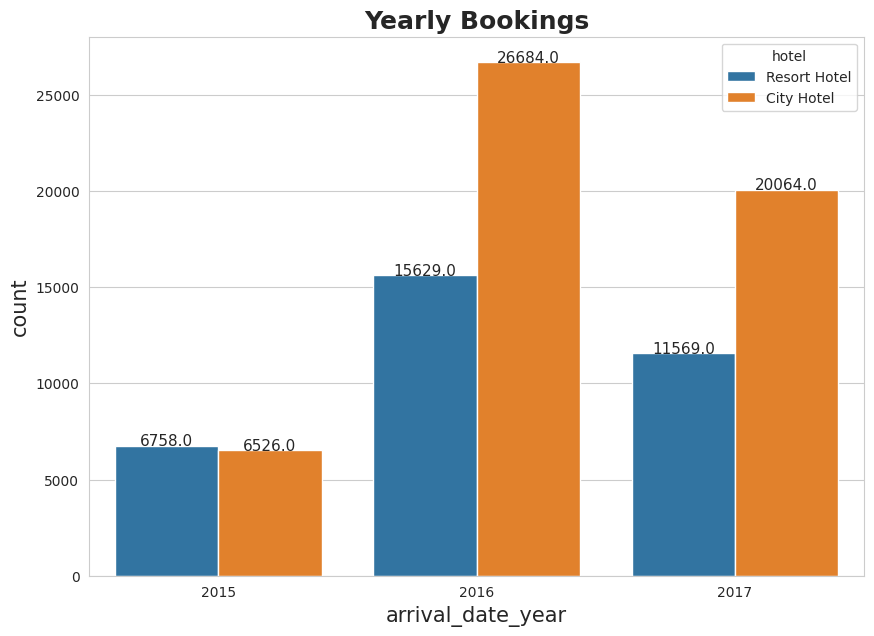

In [36]:
# Chart - 1 visualization code
ax = plt.subplots(figsize = (10,7))
ax =sns.countplot(x = 'arrival_date_year', data=df_new, hue='hotel')
ax.set_title('Yearly Bookings',fontsize = 18, fontweight='bold')
ax.set_xlabel('arrival_date_year', fontsize = 15)
ax.set_ylabel('count', fontsize = 15)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width()  / 2,rect.get_height()+ 0.75,rect.get_height(),horizontalalignment='center', fontsize = 11)

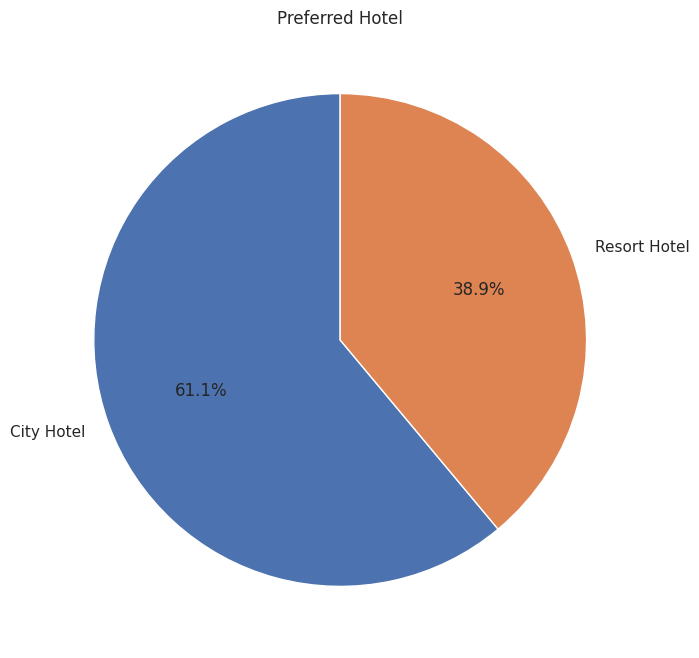

In [69]:
# Count the occurrences of each hotel type
hotel_counts = df_new['hotel'].value_counts()

# Create a pie chart
plt.pie(hotel_counts, labels=hotel_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Preferred Hotel")

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

- Barplots gives flexibility & clarity of information. It is very using while comparing 'Yearly Bookings' among two hotels over the years.

##### 2. What is/are the insight(s) found from the chart?

- City hotel is having higher number of bookings compared to Resort hotel.
- In 2015, City hotel is having 24% more bookings than Resort hotel.
- In 2016, City hotel is having 34% more bookings than Resort hotel.
- In 2017, City hotel is having 35% more bookings than Resort hotel.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We must allocate more resources towards City Hotel compared to Resort Hotel.
-  To catch up with City hotel, we need to focus on ways to increase our bookings at Resort Hotel.

#### Chart - 2

###Countrywise Guests

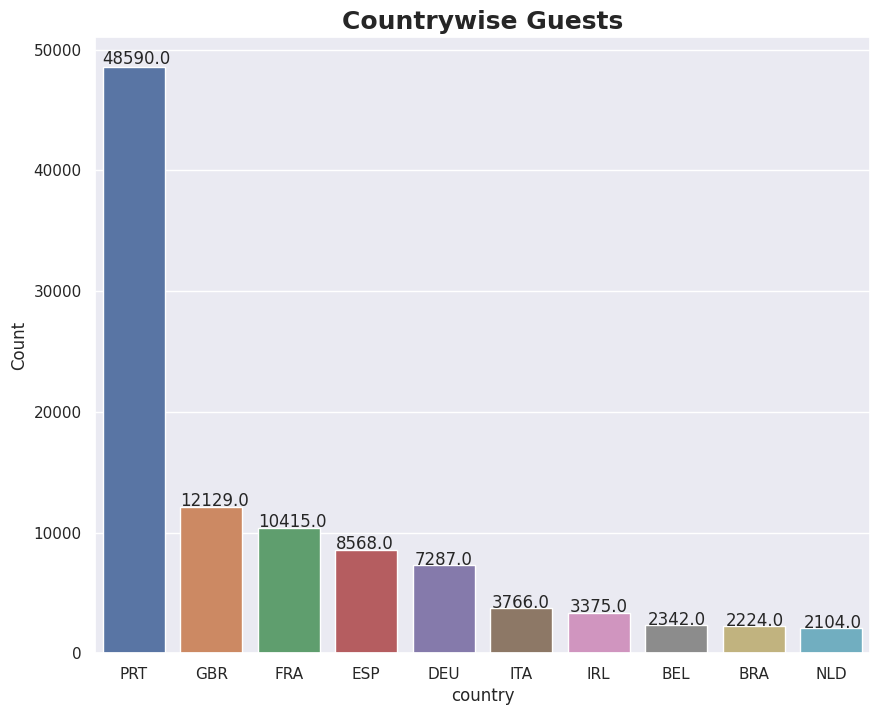

In [38]:
# Chart - 2 visualization code
# import data
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(10,8)})

# plot barplot
a = sns.barplot(x = list(df.country.value_counts().head(10).index) , y =list(df.country.value_counts().head (10)), data = df_new)

# add label to the axis and label to the plot
a.set(xlabel ="country", ylabel = "Count")
a.set_title('Countrywise Guests', fontsize = 18, fontweight='bold')

for p in a.patches:
    a.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

##### 1. Why did you pick the specific chart?

- Country wise segregation can be well analysed using barplot here.

##### 2. What is/are the insight(s) found from the chart?

- Number of guests coming from Portugal is highest among Top 5 countries followed by Britain, France, Spain & Germany.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- As number of guests from Portugal are highest, we can offer customer specific servies based on their customs & traditions during their stay.
- We can appoint translators for our guests coming from top 5 countries.
- We can diversify our customer base among Top 10 countries to avoid dependence from a particular country. This can be done using country specific marketing campaigns & advertisements.

#### Chart - 3

###Booking Cancellations by hotel types


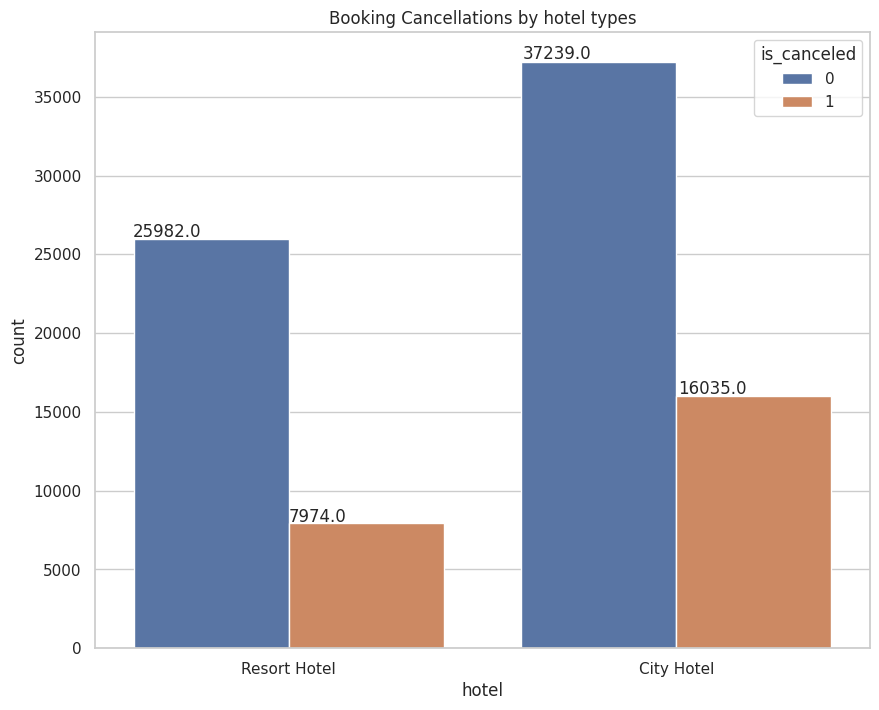

In [39]:
# Chart - 3 visualization code
sns.set(style = "whitegrid")
plt.title("Booking Cancellations by hotel types")
a = sns.countplot(x = "hotel", hue = 'is_canceled', data = df_new)
for p in a.patches:
    a.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

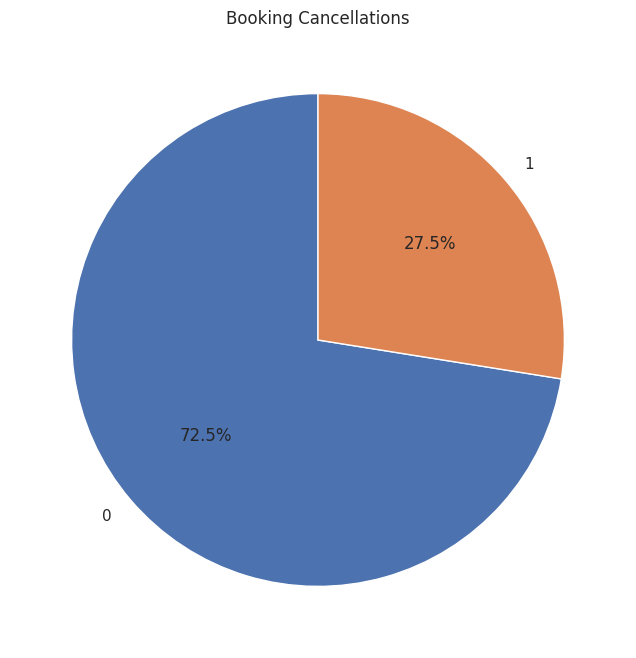

In [40]:
# Count the occurrences of each cancellation value
cancel_counts = df_new['is_canceled'].value_counts()

# Create a pie chart
plt.pie(cancel_counts, labels=cancel_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title("Booking Cancellations")

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

- Barplots are really helpful in comparing two hotel types over the years. It gives clear idea about Total bookings & Cancellations out of those bookings.

##### 2. What is/are the insight(s) found from the chart?

- Booking Cancellations in Resort hotel, is around 27% out of total bookings & in City hotel, is around 41% out of total bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- City hotel are having 21,959 number of cancellations more than Resort hotel.

#### Chart - 4

###Monthwise Bookings & Monthwise Booking Cancellations

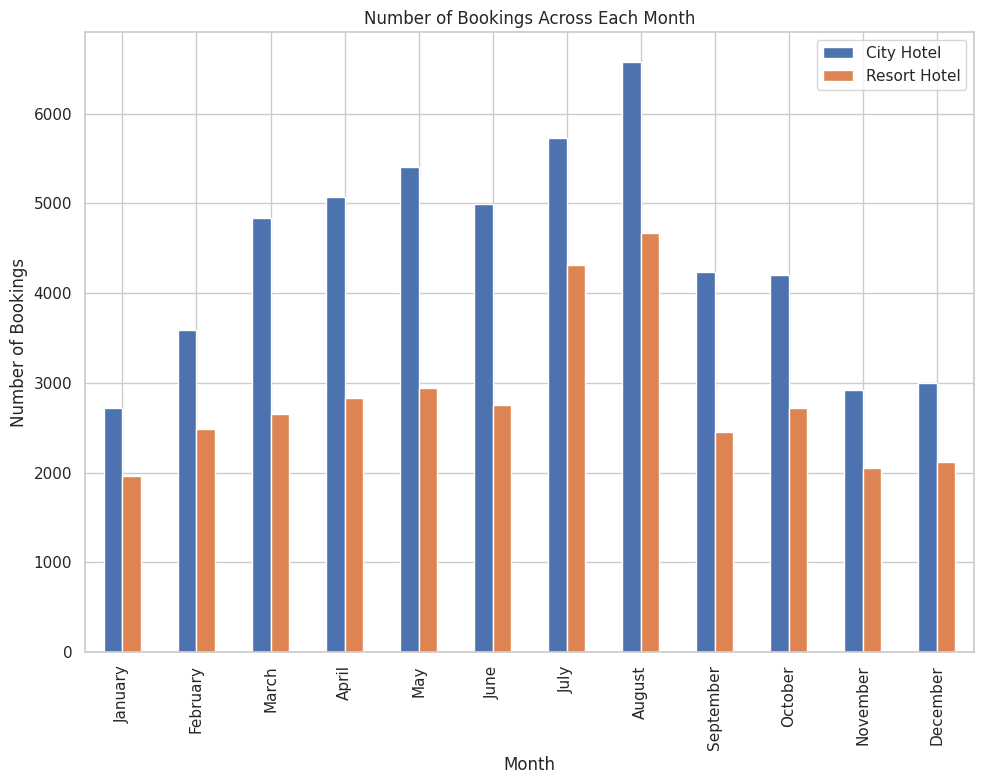

In [79]:
import calendar

# Filter the dataset for city hotels
city_df = df_new[df_new['hotel'] == 'City Hotel']

# Calculate the number of bookings per month for city hotels
city_bookings_per_month = city_df['arrival_date_month'].value_counts().sort_index()

# Filter the dataset for resort hotels
resort_df = df_new[df_new['hotel'] == 'Resort Hotel']

# Calculate the number of bookings per month for resort hotels
resort_bookings_per_month = resort_df['arrival_date_month'].value_counts().sort_index()

# Create a DataFrame to store the number of bookings per month for both hotel types
data = pd.DataFrame({'City Hotel': city_bookings_per_month,
                     'Resort Hotel': resort_bookings_per_month})

# Create a list of month names in the correct order
month_order = [calendar.month_name[i] for i in range(1, 13)]

# Reindex the DataFrame to ensure the correct order of months
data = data.reindex(month_order)

# Create a grouped bar plot
data.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Across Each Month')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


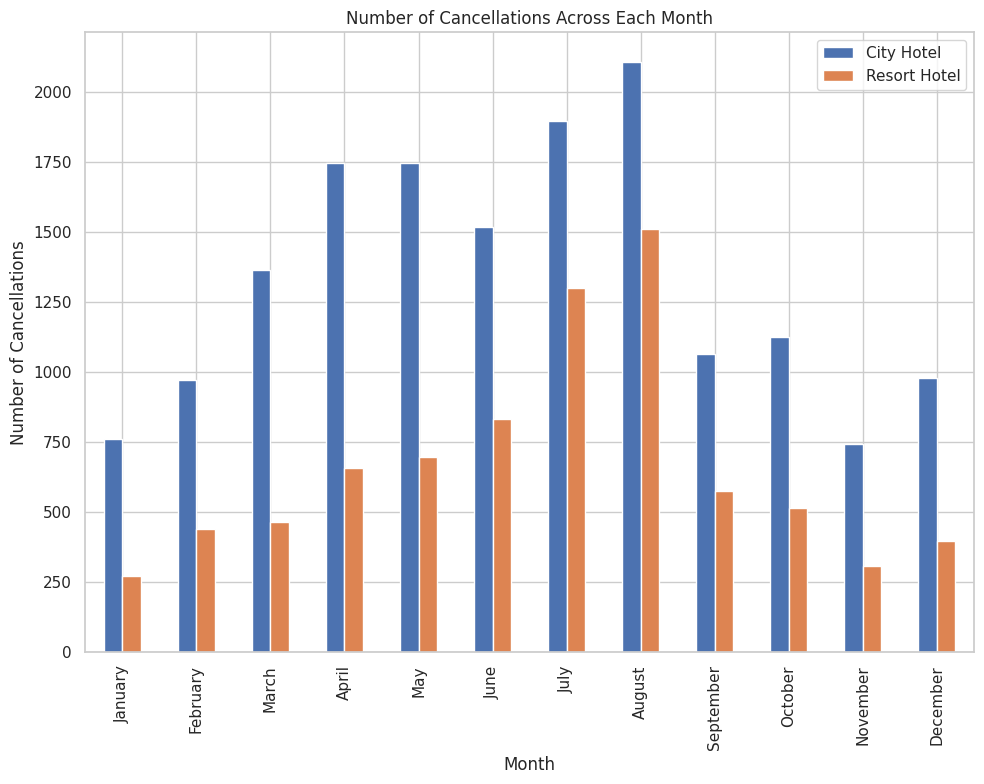

In [80]:
import calendar

# Filter the dataset for cancelled bookings in city hotels
city_cancelled_df = df_new[(df_new['hotel'] == 'City Hotel') & (df['is_canceled'] == 1)]

# Calculate the number of cancellations per month for city hotels
city_cancellations_per_month = city_cancelled_df['arrival_date_month'].value_counts().sort_index()

# Filter the dataset for cancelled bookings in resort hotels
resort_cancelled_df = df_new[(df_new['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 1)]

# Calculate the number of cancellations per month for resort hotels
resort_cancellations_per_month = resort_cancelled_df['arrival_date_month'].value_counts().sort_index()

# Create a DataFrame to store the number of cancellations per month for both hotel types
data = pd.DataFrame({'City Hotel': city_cancellations_per_month,
                     'Resort Hotel': resort_cancellations_per_month})

# Create a list of month names in the correct order
month_order = [calendar.month_name[i] for i in range(1, 13)]

# Reindex the DataFrame to ensure the correct order of months
data = data.reindex(month_order)

# Create a grouped bar plot
data.plot(kind='bar')

# Set the labels and title
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.title('Number of Cancellations Across Each Month')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

- With the help of Bar plots we can see trends or patterns in bookings & cancellations over the years.

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- During off season period, we can regulate hotel expenses & better utilize our resources.

#### Chart - 5

###Market Segment wise Hotel bookings

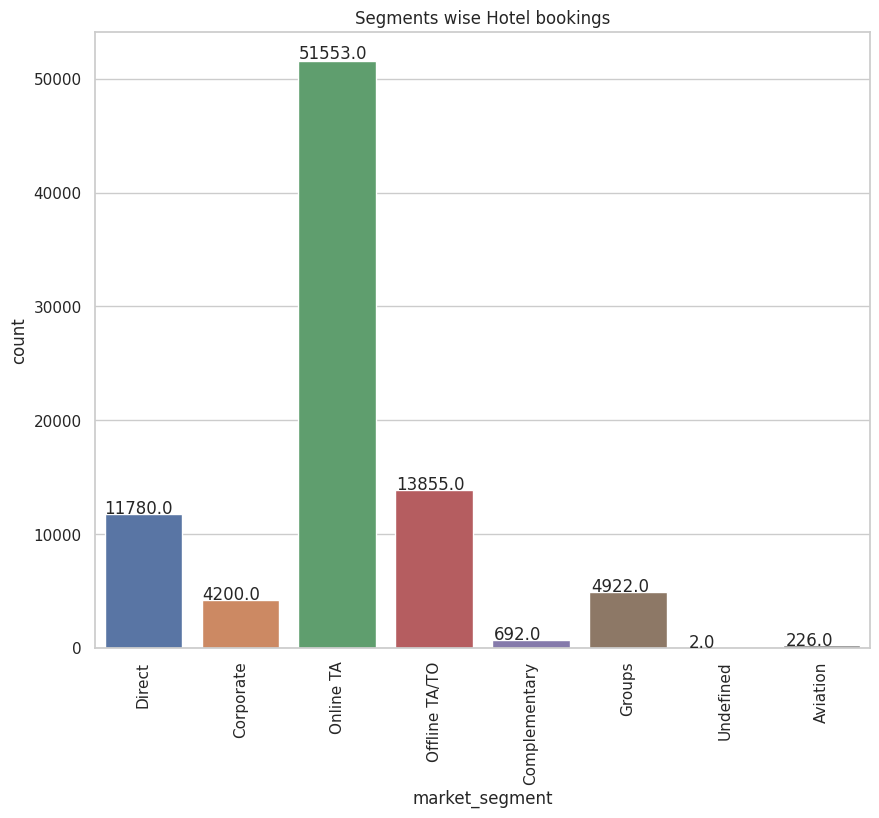

In [46]:
# Chart - 5 visualization code
# Market Segment wise Hotel bookings
plt.title("Segments wise Hotel bookings")
ax = sns.countplot(x = "market_segment", data = df_new)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

- In this case, Barplot provides a clear representation of the data, allowing us to communicate your findings effectively.

##### 2. What is/are the insight(s) found from the chart?

- Through Online Travel agents most of the hotel bookings are done followed by Offline TA/TO & Group bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- We can incentivize our Online travel agents as per our business growth & offer competitive pricings to our customers.
- We can improve our online presence so that we can get more bookings through Direct category.

#### Chart - 6

###Relationship between Market segments and Cancellations

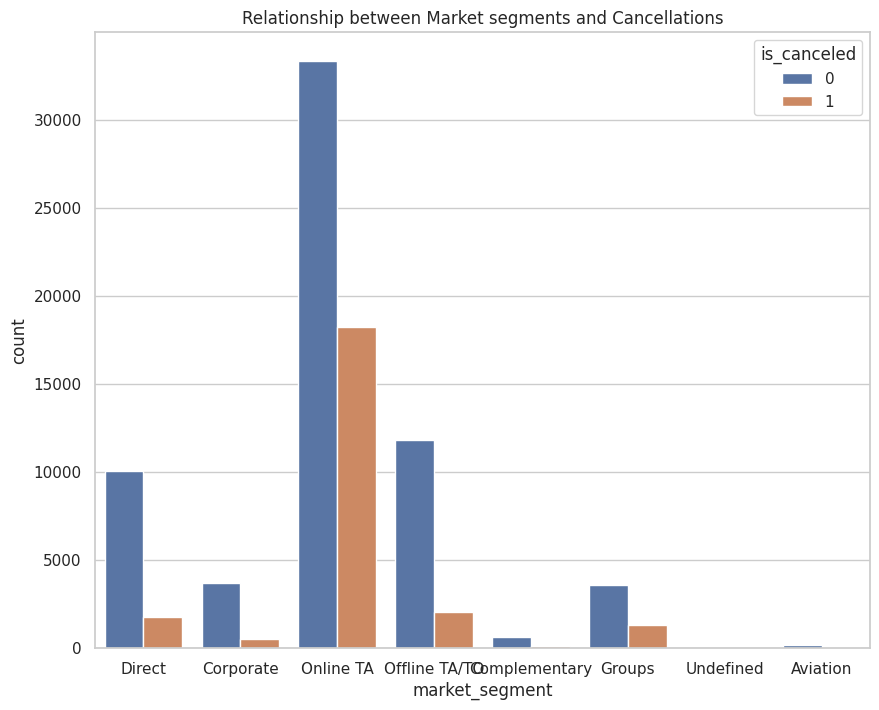

In [47]:
# Chart - 6 visualization code
# Relationship between Market segments and Cancellations
plt.title("Relationship between Market segments and Cancellations")
sns.countplot(x='market_segment',data=df_new ,hue='is_canceled')
figsize=(15, 10)

##### 1. Why did you pick the specific chart?

- By grouping bars or using stacked bars, we can visualize the distribution of multiple categories within each group or compare the values of different variables side by side.

##### 2. What is/are the insight(s) found from the chart?

- We can see that Customers booking directly is having huge potential for our revenue growth because Direct bookings are showing far less cancellations compared to others. Around 16% of Direct bookings gets cancelled.
- Around 35% bookings made through Online TA gets cancelled.
- Around 33% bookings made through Offline TA/TO gets cancelled.
- Around 60% of Group bookings gets cancelled.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- In case of cancellations, group bookings customers must be penalized accordingly in order to avoid revenue losses.

#### Chart - 7

###Hotel Bookings by Customer Type

In [48]:
df_new.customer_type.unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

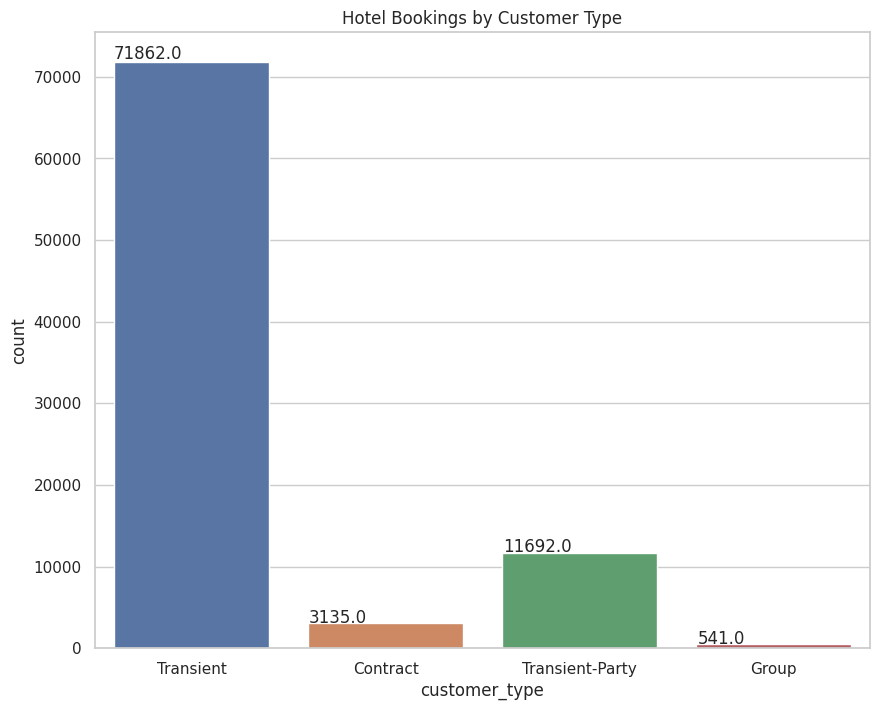

In [49]:
# Chart - 7 visualization code
# Hotel Bookings by Customer Type
plt.title("Hotel Bookings by Customer Type")
ax = sns.countplot(x = "customer_type", data = df_new)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

##### 1. Why did you pick the specific chart?

- Bar plots present data in a clear and concise manner, making it easy to understand and interpret.

##### 2. What is/are the insight(s) found from the chart?

- Around 75% of customers are Transient & 21% of customers are Transient-Party.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Our dependence on these two customers are very high. We need to diversify our customer base.

#### Chart - 8

### Relationship between lead time and cancellations

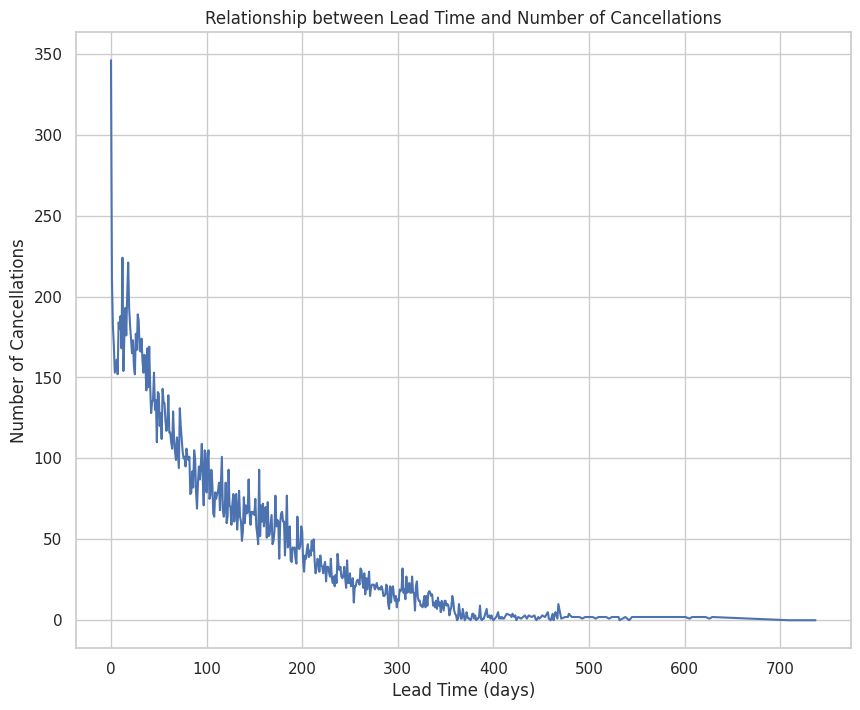

In [50]:
# Relationship between lead time and cancellations
cancellations = df_new[df_new['is_canceled'].isin([0, 1])]
cancellations_count = cancellations.groupby('lead_time')['is_canceled'].sum().reset_index(name='cancellations')
plt.plot(cancellations_count['lead_time'], cancellations_count['cancellations'])
plt.xlabel('Lead Time (days)')
plt.ylabel('Number of Cancellations')
plt.title('Relationship between Lead Time and Number of Cancellations')
plt.show()


##### 1. Why did you pick the specific chart?

 - Line plots are particularly effective in visualizing trends and patterns in data. By connecting data points with lines, you can easily observe the overall direction and magnitude of changes over time or across different variables.

##### 2. What is/are the insight(s) found from the chart?

- Less number of lead time days are more prone towards higher cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Instead of cancellations we can think of giving our customers option of rescheduling during our off-season period.

#### Chart - 9

###Relationship between Deposit type and Cancellations

In [51]:
# Chart - 8 visualization code
# Various columns under deposits
df_new.deposit_type.unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

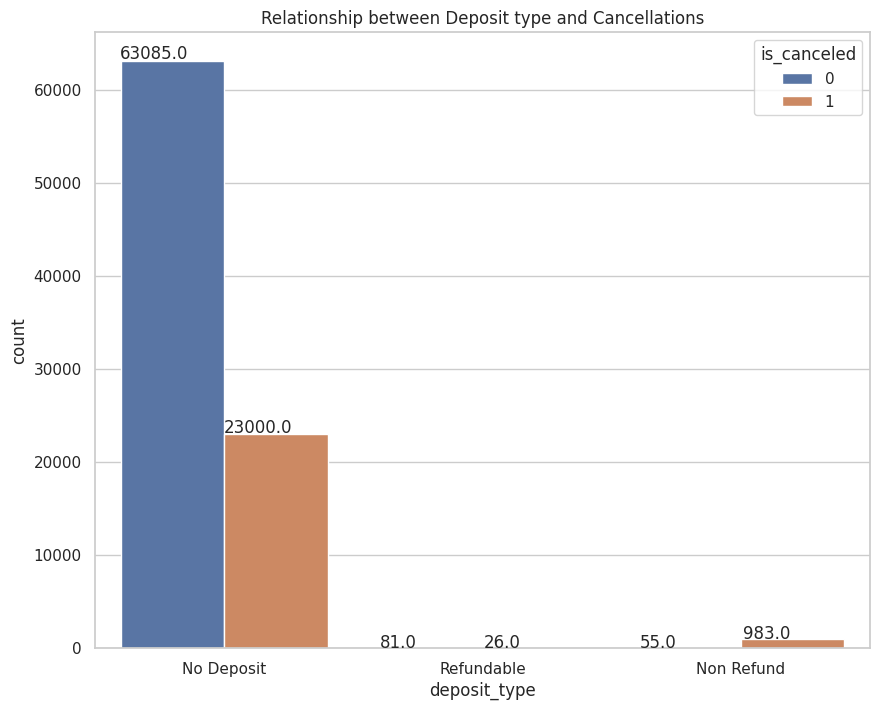

In [52]:
# Relationship between Deposit type and Cancellations
plt.title("Relationship between Deposit type and Cancellations")
ax = sns.countplot(x='deposit_type',data=df_new ,hue='is_canceled')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

In [53]:
df_new.shape

(87230, 31)

##### 1. Why did you pick the specific chart?

- Pandas' bar plots seamlessly integrate with other pandas functionalities. You can use them in conjunction with filtering, grouping, and aggregating operations, enabling you to explore and visualize subsets of your data effectively.

##### 2. What is/are the insight(s) found from the chart?

- 28% of No deposit type bookings are prone to cancellations.
- Almost All Non refund type bookings gets cancelled.
- Refundable deposit type bookings cancellations seems negligible in numbers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- It is curious to know that despite No refund customers cancelled their bookings in Non refund type.
- Hotel must stop taking bookings without deposits.

#### Chart - 10

###Relationship between Previous Cancellations and Cancellations

In [81]:
# Chart - 10 visualization code
df_new.groupby('previous_cancellations').count()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Total_Guests,Total_stay
previous_cancellations,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549,85549
1,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405,1405
2,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110,110
3,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61,61
4,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
5,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
6,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
11,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
13,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


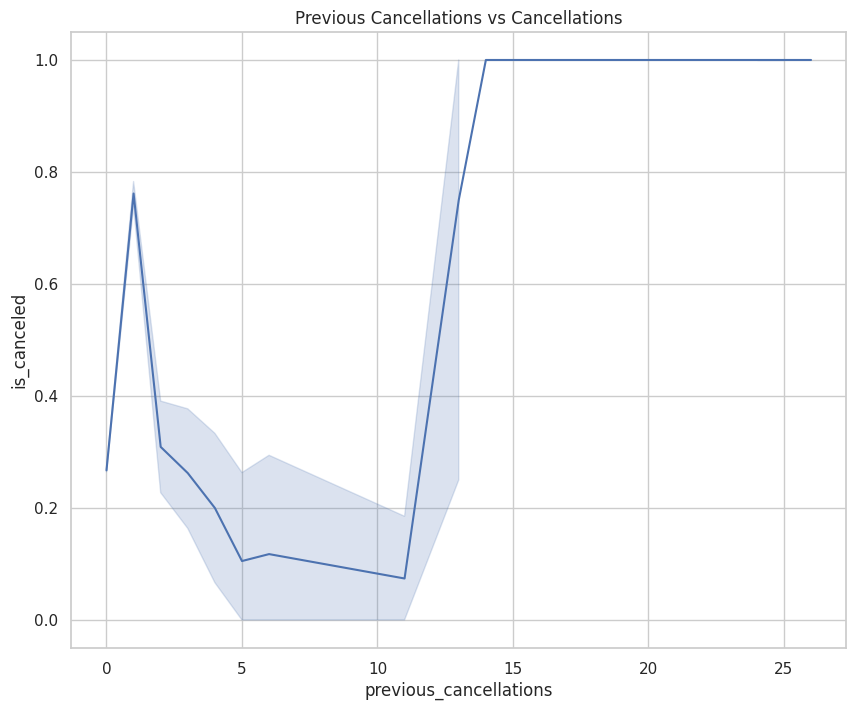

In [82]:
plt.title ('Previous Cancellations vs Cancellations')
ax = sns.lineplot(x= 'previous_cancellations' ,y = "is_canceled", data = df_new)

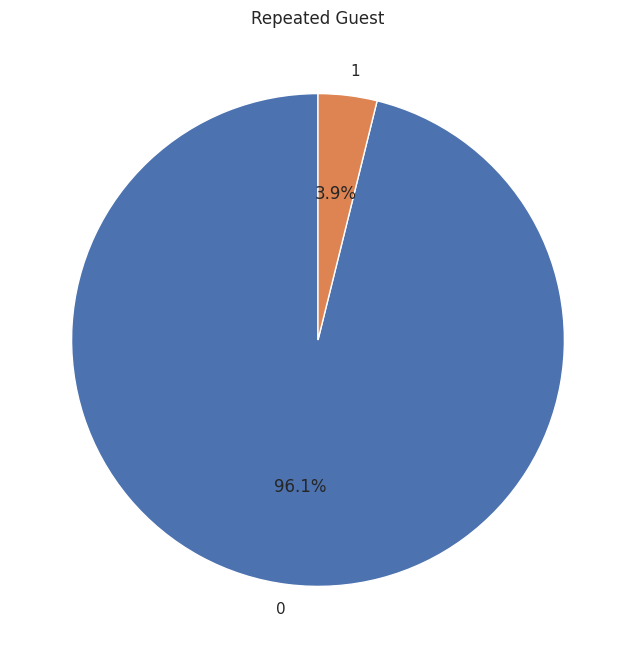

In [57]:
# Count the occurrences of each value in 'is_repeated_guest'
repeat_guest_counts = df_new['is_repeated_guest'].value_counts()

# Create a pie chart
plt.pie(repeat_guest_counts, labels=repeat_guest_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Repeated Guest')

# Display the chart
plt.show()

##### 1. Why did you pick the specific chart?

-  Line plots provide a clear and intuitive representation of how data changes over time.

##### 2. What is/are the insight(s) found from the chart?

- Customers who have cancelled their bookings previously are more prone towards cancellations next time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Customers with previous cancellations history must be penalized accordingly & should be allowed make a booking only during off season.

#### Chart - 11

###Distribution of Reserved Room types in City & Resort hotel

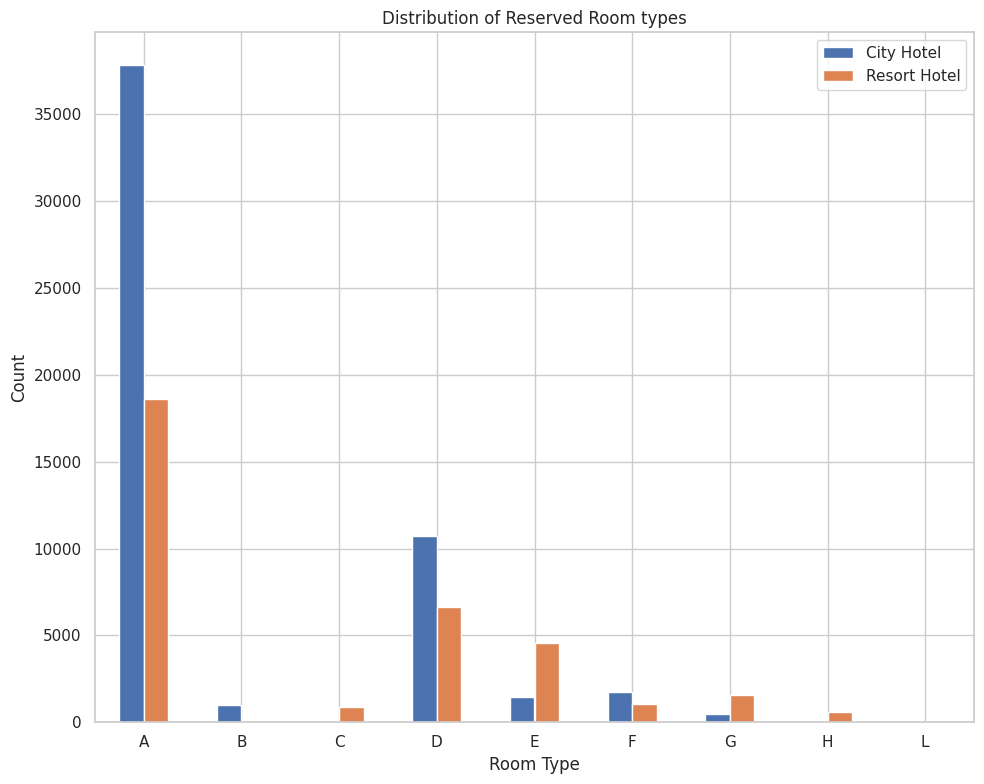

In [74]:
# Distribution of Reserved Room types in City & Resort hotel
# Filter the dataset for city hotels
city_df = df_new[df_new['hotel'] == 'City Hotel']

# Calculate the distribution of room types for city hotels
city_room_type_counts = city_df['reserved_room_type'].value_counts()

# Filter the dataset for resort hotels
resort_df = df_new[df_new['hotel'] == 'Resort Hotel']

# Calculate the distribution of room types for resort hotels
resort_room_type_counts = resort_df['reserved_room_type'].value_counts()

# Get the unique room types across both hotel types
unique_room_types = sorted(set(city_room_type_counts.index) | set(resort_room_type_counts.index))

# Create a DataFrame to store the room type counts for both hotel types
data = pd.DataFrame({'City Hotel': city_room_type_counts.reindex(unique_room_types).fillna(0),
                     'Resort Hotel': resort_room_type_counts.reindex(unique_room_types).fillna(0)})

# Create a grouped bar plot
data.plot(kind='bar')

# Set the labels and title
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Reserved Room types')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 12

###Distribution of Meals in City & Resort hotel

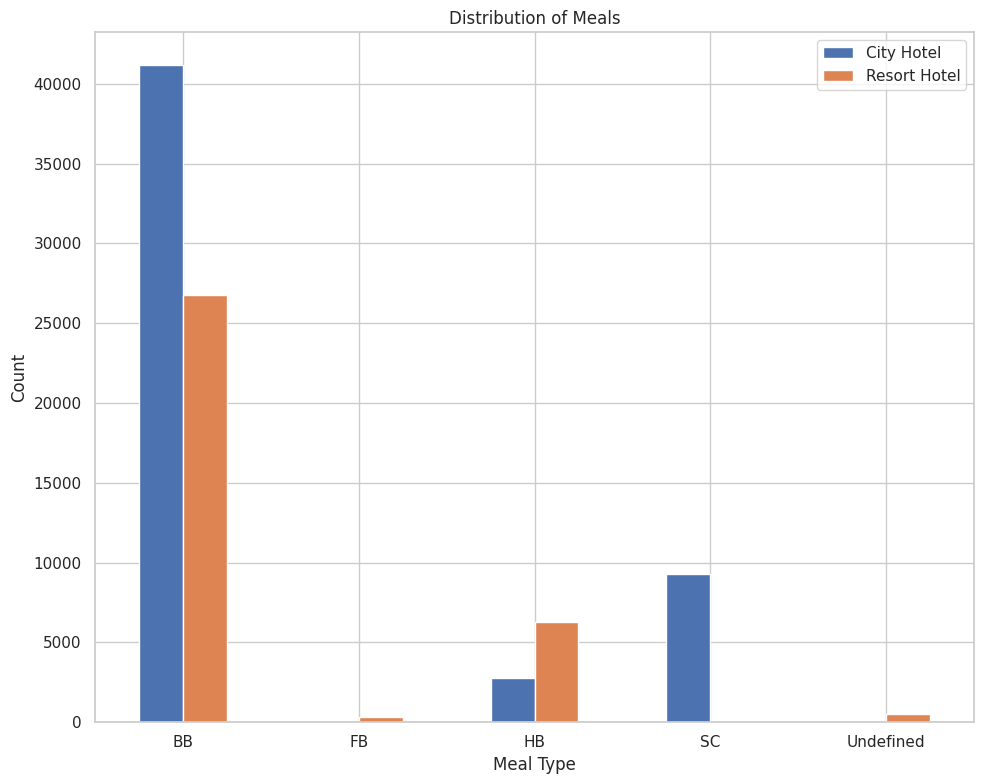

In [72]:
# Distribution of Meals in City & Resort hotel
# Filter the dataset for city hotels
city_df = df_new[df_new['hotel'] == 'City Hotel']

# Calculate the distribution of meals for city hotels
city_meal_counts = city_df['meal'].value_counts()

# Filter the dataset for resort hotels
resort_df = df_new[df_new['hotel'] == 'Resort Hotel']

# Calculate the distribution of meals for resort hotels
resort_meal_counts = resort_df['meal'].value_counts()

# Get the unique meals across both hotel types
unique_meals = sorted(set(city_meal_counts.index) | set(resort_meal_counts.index))

# Create a DataFrame to store the meal counts for both hotel types
data = pd.DataFrame({'City Hotel': city_meal_counts.reindex(unique_meals).fillna(0),
                     'Resort Hotel': resort_meal_counts.reindex(unique_meals).fillna(0)})

# Create a grouped bar plot
data.plot(kind='bar')

# Set the labels and title
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.title('Distribution of Meals')

# Rotate the x-axis labels for better visibility
plt.xticks(rotation=0)

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 13

###Relationship between adr

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 14

###Relationship between required_car_parking_spaces and customer_type

In [59]:
df_new.required_car_parking_spaces.unique()

array([0, 1, 2, 8, 3])

Text(0.5, 1.0, 'Relationship between required_car_parking_spaces and customer_type')

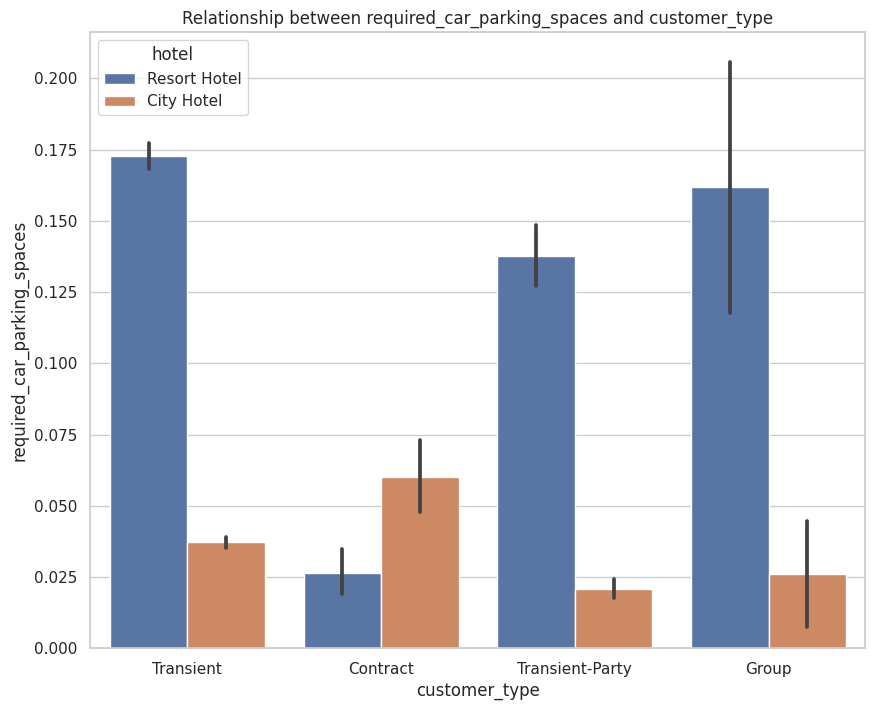

In [60]:
# Relationship between required_car_parking_spaces and customer_type
sns.barplot(data = df_new, x = 'customer_type', y = 'required_car_parking_spaces', hue = 'hotel')
plt.title('Relationship between required_car_parking_spaces and customer_type')

##### 1. Why did you pick the specific chart?

- It is very useful for comparing the values of different categories or groups.

##### 2. What is/are the insight(s) found from the chart?

- We can see that most of Resort hotel customers especially (Transient, Transient-Party & Group customers) requires more parking spaces than City hotel customers except (Contract customers).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

#### Chart - 15

###Relationship between hotel type and stays_in_week_nights & stays_in_weekend_nights

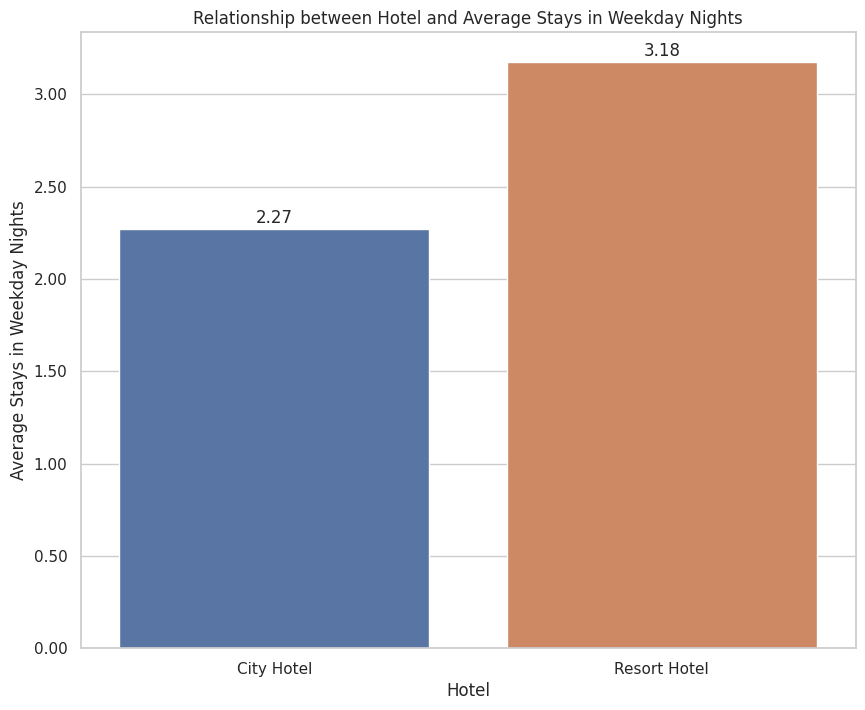

In [61]:
# Relationship between hotel type and stays_in_week_nights
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Group the data by 'hotel' and calculate the mean of 'stays_in_weekend_nights'
average_nights = df_new.groupby('hotel')['stays_in_week_nights'].mean().reset_index()

# Create a bar plot to visualize the relationship
ax = sns.barplot(data=average_nights, x='hotel', y='stays_in_week_nights')


# Define a formatting function to round off values
def format_func(value, tick_number):
    return f'{value:.2f}'

# Apply the formatting function to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Display the rounded-off values above the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, format_func(height, 0),
            ha='center', va='bottom')

# Add labels and title to the plot
plt.xlabel('Hotel')
plt.ylabel('Average Stays in Weekday Nights')
plt.title('Relationship between Hotel and Average Stays in Weekday Nights')

# Display the plot
plt.show()


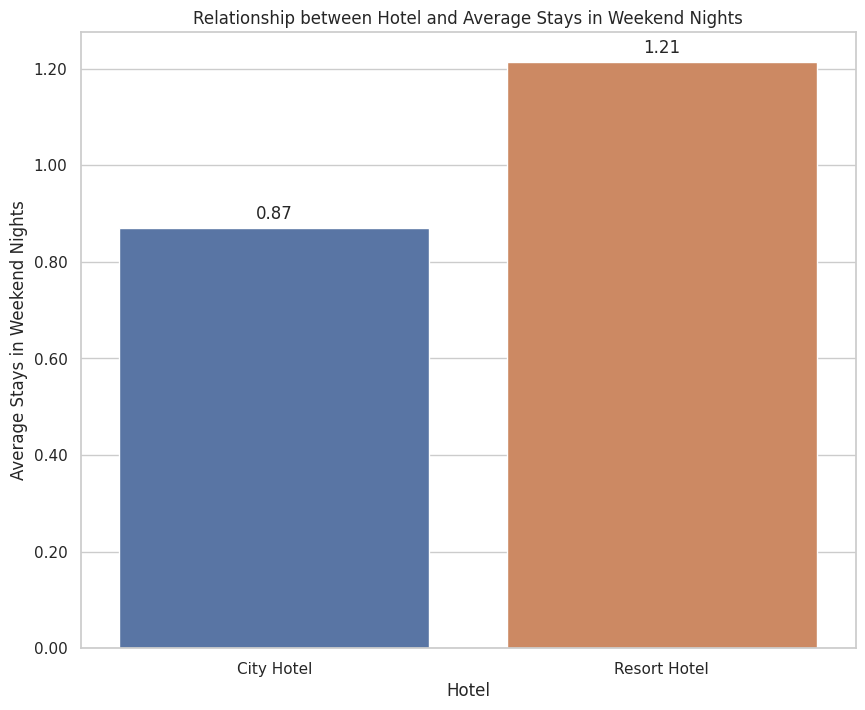

In [62]:
# Relationship between hotel type and stays_in_weekend_nights
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Group the data by 'hotel' and calculate the mean of 'stays_in_weekend_nights'
average_nights = df_new.groupby('hotel')['stays_in_weekend_nights'].mean().reset_index()

# Create a bar plot to visualize the relationship
ax = sns.barplot(data=average_nights, x='hotel', y='stays_in_weekend_nights')


# Define a formatting function to round off values
def format_func(value, tick_number):
    return f'{value:.2f}'

# Apply the formatting function to the y-axis
ax.yaxis.set_major_formatter(FuncFormatter(format_func))

# Display the rounded-off values above the bars
for i, bar in enumerate(ax.patches):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.01, format_func(height, 0),
            ha='center', va='bottom')

# Add labels and title to the plot
plt.xlabel('Hotel')
plt.ylabel('Average Stays in Weekend Nights')
plt.title('Relationship between Hotel and Average Stays in Weekend Nights')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

- Bar plots are very useful to compare multiple variables simultaneously.

##### 2. What is/are the insight(s) found from the chart?

- Average Stays in Weekday Nights in case of resort hotel is 3.13 & city hotel is 2.18.
- Average Stays in Weekend Nights in case of resort hotel is 1.19 & city hotel is 0.79.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- As Average Stays in Weekend are lesser compared to weekday stays, We can introduce many recreational activities in hotels on weekends.
- We can allocate some space in hotels for family as well as corporate functions.

#### Chart - 16 - Correlation Heatmap

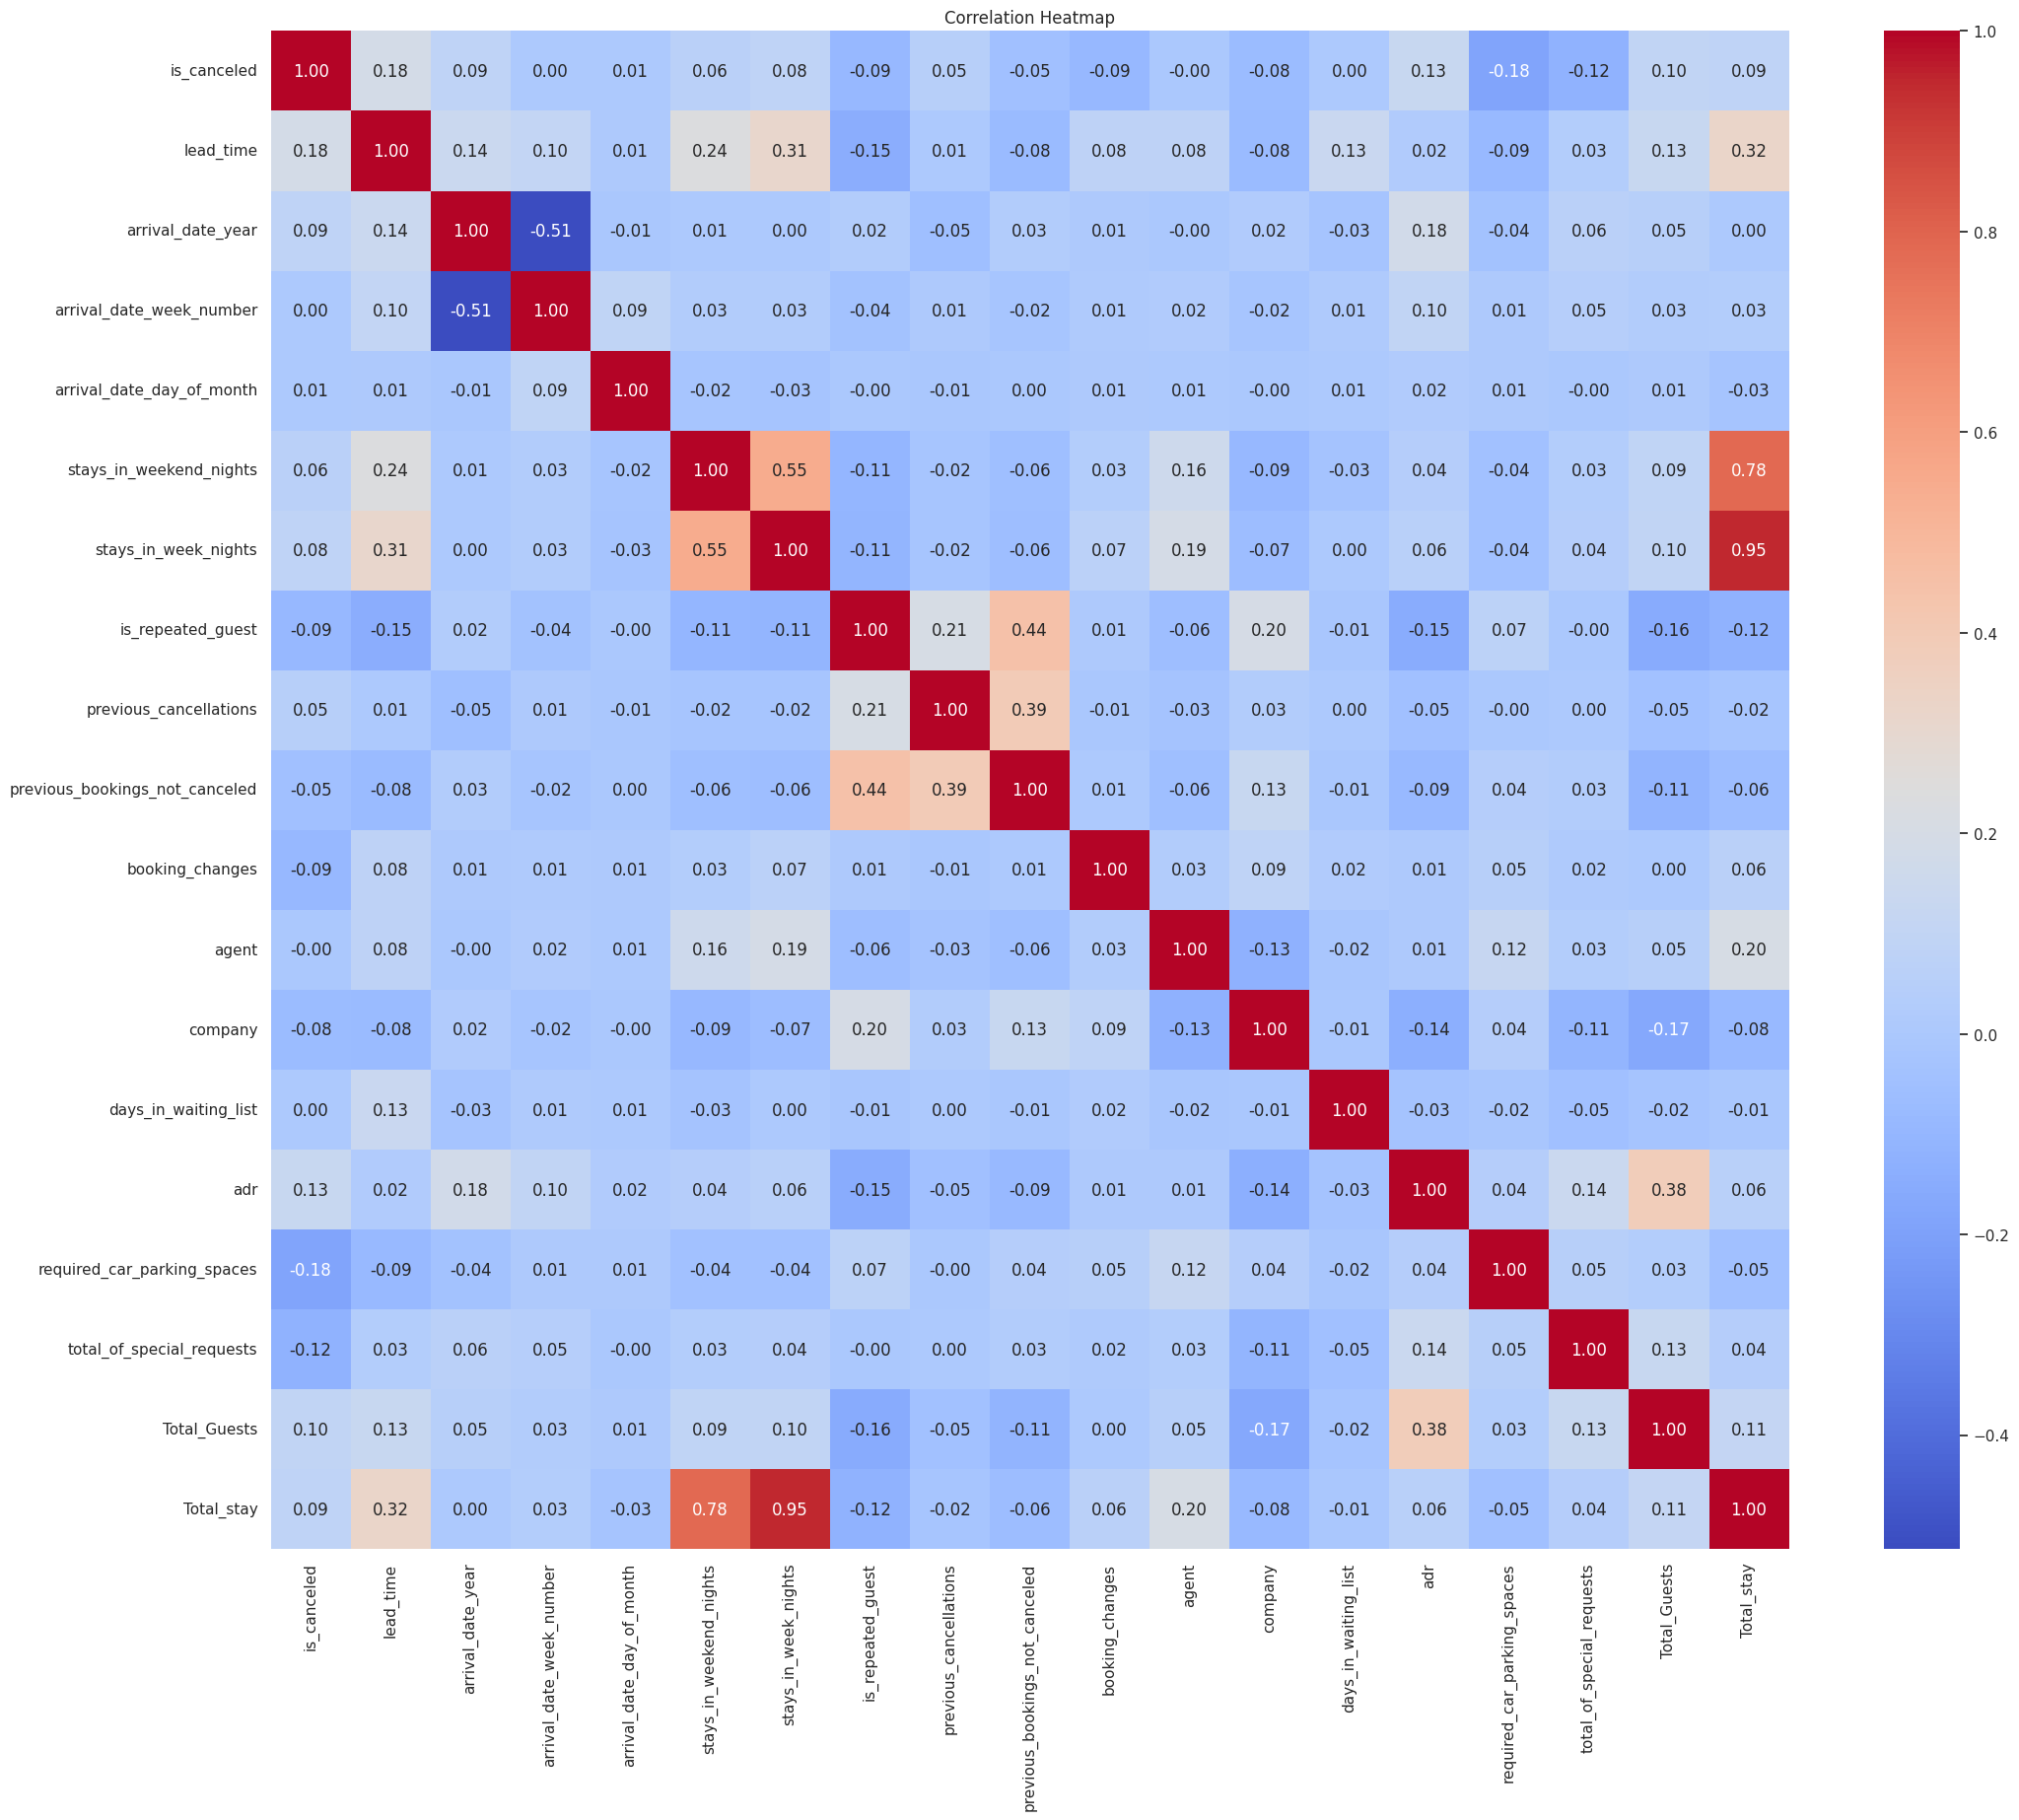

In [85]:
# Calculate the correlation matrix
correlation_matrix = df_new.corr()

# Generate a heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

- Heat Maps are representations of data using color-coded systems. Heat Maps gives us a better understanding to visualize the datapoints which are having high corelations.

##### 2. What is/are the insight(s) found from the chart?

- Highly corelated variables are having color shades more tilted towards Red (stays_in_week_nights & Total_Stay); Least corelated variables are having color shades more tilted towards Blue (is_repeated_guest & adr). Some moderately corelated variables can be seen in White color (previous_bookings_not_canceled & is_repeated_guest).

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

- The Hotel Booking Analysis project provides valuable insights into hotel booking patterns, customer preferences, and revenue optimization strategies. By analyzing the dataset spanning July 2015 to August 2017, this project offers practical recommendations for hotels to enhance their operational efficiency, increase customer satisfaction, and maximize revenue. The findings enable hoteliers and industry stakeholders to make informed decisions and develop effective strategies to stay competitive in the dynamic hotel industry.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***